In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

import PIL
import glob

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
Sa1_files = glob.glob("sa1_16to20/*")

In [4]:
len(Sa1_files)

93

In [5]:
for filename in Sa1_files:
    filename = filename.split('/')[1]
    
    # Satellite 1
    Sa_1_File = "sa1_256/" + filename;
    Sa1 = PIL.Image.open(Sa_1_File).convert("L")
    Sa1arr = np.array(Sa1).flatten()
    
    
    # Satellite 2
    Sa_2_File = "sa2_256/" + filename;
    Sa2 = PIL.Image.open(Sa_2_File).convert("L")
    Sa2arr = np.array(Sa2).flatten()
    
    
    # Satellite 3
    Sa_3_File = "sa3_256/" + filename;
    Sa3 = PIL.Image.open(Sa_3_File).convert("L")
    Sa3arr = np.array(Sa3).flatten()
    
    # Satellite 4
    Sa_4_File = "sa4_256/" + filename;
    Sa4 = PIL.Image.open(Sa_4_File).convert("L")
    Sa4arr = np.array(Sa4).flatten()
    
    # Satellite 6
    Sa_6_File = "sa6_256/" + filename;
    Sa6 = PIL.Image.open(Sa_6_File).convert("L")
    Sa6arr = np.array(Sa6).flatten()
    
    # Radar
    Radar_File = "radpng/" + filename.replace('sat', "rad", 1)
    Radar = PIL.Image.open(Radar_File).convert("L")
    Radararr = np.array(Radar).flatten()
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)

In [6]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [7]:
Y_output.shape

(6094848,)

In [8]:
X_input.shape

(6094848, 5)

# Fit the model

In [9]:
reg = linear_model.LinearRegression()
reg.fit (X_input, Y_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
reg.coef_

array([ 0.06831762, -0.02318444, -0.0121471 ,  0.07997718, -0.06808576])

In [11]:
for feat, coef in zip(X_names, reg.coef_):
    print('{}       {}'.format(feat, coef))

Band 1       0.06831762240626645
Band 2       -0.023184440668761026
Band 3       -0.012147104456421323
Band 4       0.07997717522827576
Band 6       -0.06808575859174068


In [12]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg.coef_})

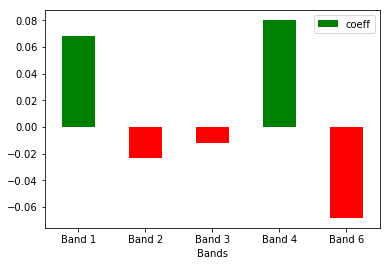

In [13]:
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g', 'r', 'r', 'g', 'r'))
plt.show()